In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Univariate Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Muneeza_Mehboob_ML_Assignment/Salary_dataset.csv")

df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
# Drop extra column

df = df.drop(columns=["Unnamed: 0"])    

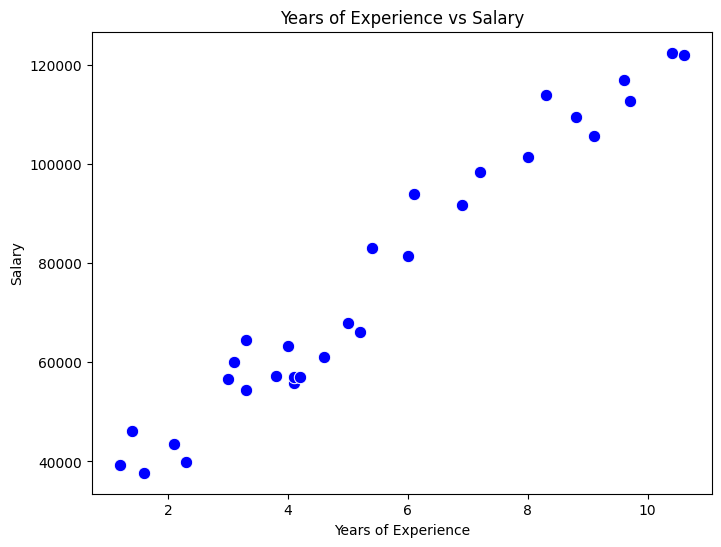

In [6]:
# Scatter plot of YearsExperience vs Salary

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["YearsExperience"], y=df["Salary"], color="blue", s=80)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")
plt.show()


In [7]:
X = df["YearsExperience"].values
y = df["Salary"].values

# Feature scaling (Normalization)
X = (X - np.mean(X)) / np.std(X)   # standardization
y = (y - np.mean(y)) / np.std(y)

# Reshape for calculations
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

print("\nAfter preprocessing, sample X and y:")
print(X[:5], y[:5])



After preprocessing, sample X and y:
[[-1.51005294]
 [-1.43837321]
 [-1.36669348]
 [-1.18749416]
 [-1.11581443]] [[-1.36011263]
 [-1.10552744]
 [-1.419919  ]
 [-1.20495739]
 [-1.33978143]]


In [8]:
# Hypothesis function

def hypothesis_function(X, m, c):
    return m * X + c

# Cost function (Mean Squared Error)

def mse_loss(X, y, m, c):
    n = len(y)
    y_pred = hypothesis_function(X, m, c)
    cost = (1/(2*n)) * np.sum((y - y_pred)**2)
    return cost


In [12]:
# Gradient Descent Optimization

def gradient_descent(X, y, m, c, alpha, epochs):
    n = len(y)
    cost_history = []

    for i in range(epochs):
        y_pred = hypothesis_function(X, m, c)

        # Gradients
        dm = -(1/n) * np.sum(X * (y - y_pred))
        dc = -(1/n) * np.sum(y - y_pred)

        # Update parameters
        m = m - alpha * dm
        c = c - alpha * dc

        # Save cost at every 10th epoch
        if i % 10 == 0:
            cost = mse_loss(X, y, m, c)
            cost_history.append(cost)

    return m, c, cost_history


# Training & Visualization

# Initialize parameters
theta1 = 0
theta0 = 0
alpha = 0.01     # learning rate
epochs = 1000    # number of iterations

# Run gradient descent
theta1_opt, theta0_opt, cost_history = gradient_descent(X, y, theta1, theta0, alpha, epochs)

print("\nOptimal Parameters:")
print("thetha 1 :", theta1_opt)
print("thetha 0:", theta0_opt)
print("Final Cost:", cost_history[-1])

# Predictions
y_pred = hypothesis_function(X, theta1_opt, theta0_opt)



Optimal Parameters:
thetha 1 : 0.9781993865778209
thetha 0: -3.330391518119303e-16
Final Cost: 0.02152166899685262


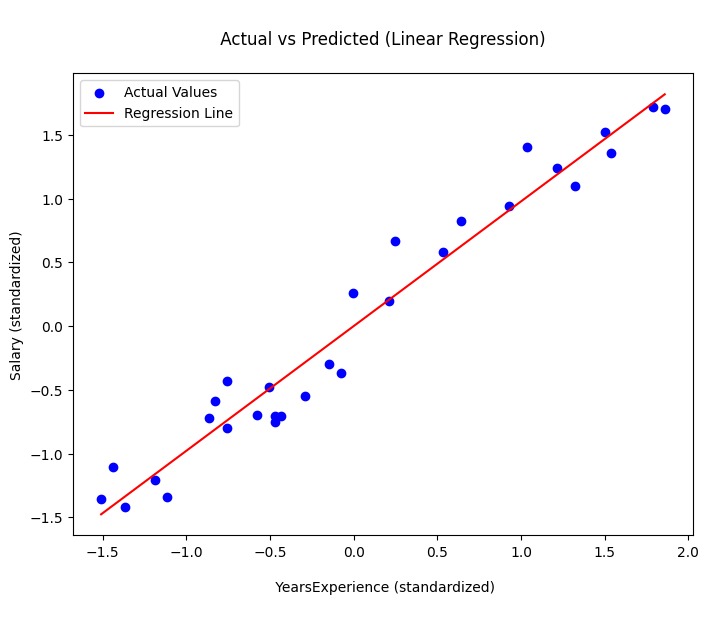

In [13]:

# Plot Actual vs Predicted

plt.figure(figsize=(8,6))
plt.scatter(X, y, color="blue", label="Actual Values")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel("\n YearsExperience (standardized)\n ")
plt.ylabel("Salary (standardized)")
plt.title("\n Actual vs Predicted (Linear Regression) \n ")
plt.legend()
plt.show()


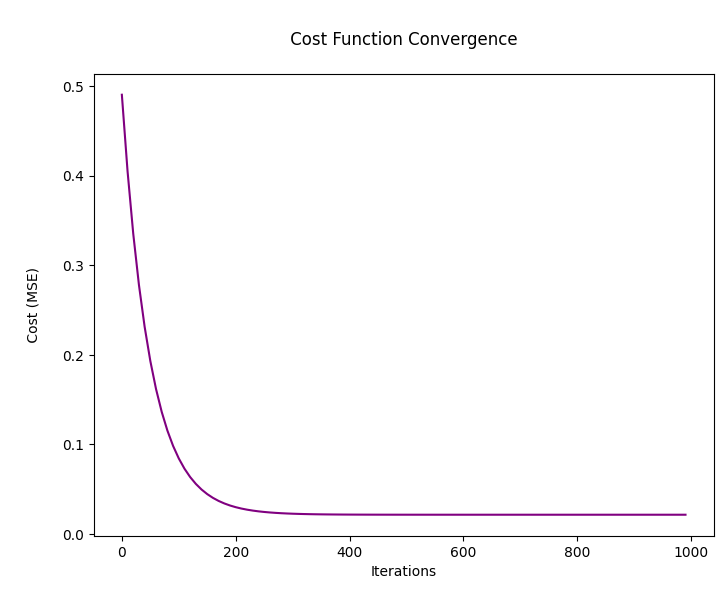

In [14]:

# Plot cost convergence

plt.figure(figsize=(8,6))
plt.plot(range(0, epochs, 10), cost_history, color="purple")
plt.xlabel("Iterations")
plt.ylabel("\n Cost (MSE) \n ")
plt.title("\n Cost Function Convergence \n ")
plt.show()


# **Multivariate Analysis**

In [15]:

# California Housing dataset

from sklearn.datasets import fetch_california_housing

# Load dataset

housing = fetch_california_housing(as_frame=True)
df_multi = housing.frame   # pandas dataframe
print("Dataset Shape:", df_multi.shape)


Dataset Shape: (20640, 9)


In [ ]:
df_multi.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df_multi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


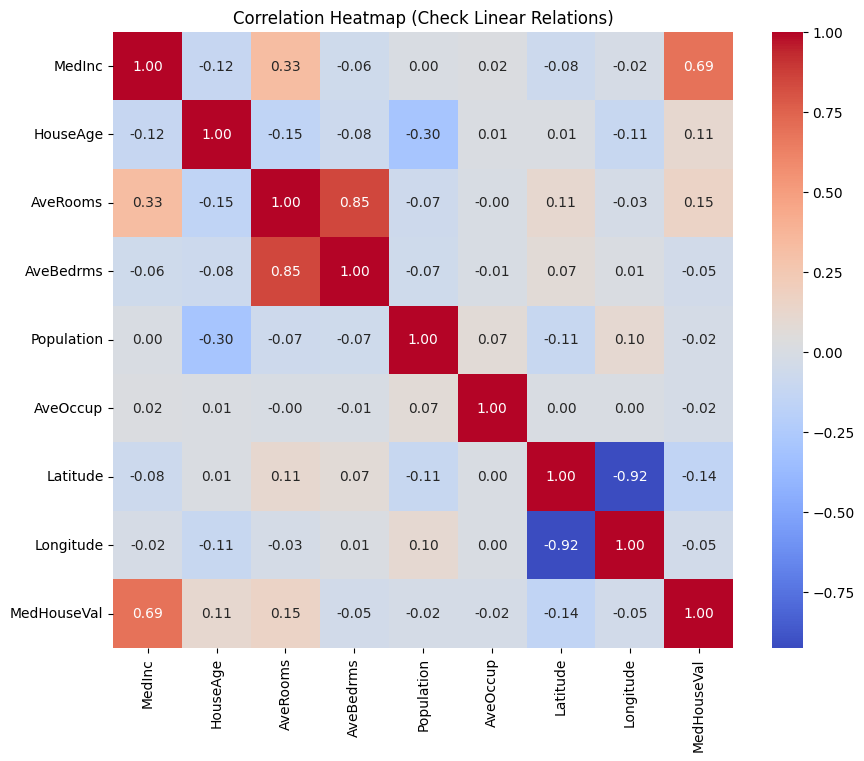

In [ ]:
# Correlation heatmap to check linear relations

plt.figure(figsize=(10,8))
corr = df_multi.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Check Linear Relations)")
plt.show()


In [ ]:
X = df_multi.drop(columns=["MedHouseVal"]).values     # Features
y = df_multi["MedHouseVal"].values   # Target

# Normalize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = (y - np.mean(y)) / np.std(y)

# Add bias c 
X = np.c_[np.ones(X.shape[0]), X]   # shape (m, n+1)
y = y.reshape(-1,1)                 # shape (m,1)

print("Feature Matrix Shape:", X.shape)
print("Target Shape:", y.shape)


Feature Matrix Shape: (20640, 9)
Target Shape: (20640, 1)


In [ ]:

def gradient_descent(X, y, alpha=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n,1))    # initialize parameters
    cost_history = []

    for i in range(epochs):
        y_pred = X @ theta              # hypothesis function
        error = y_pred - y
        cost = (1/(2*m)) * np.sum(error**2)   # MSE cost function
        cost_history.append(cost)

        # update
        theta -= (alpha/m) * (X.T @ error)

    return theta, cost_history


In [47]:
# Run Gradient Descent

theta_opt, cost_history = gradient_descent(X, y, alpha=0.01, epochs=1000)

print("Optimal Parameters (Theta):")
print(theta_opt.flatten()[:10])   # print first 10 parameters
print("\nFinal Cost:", cost_history[-1])


Optimal Parameters (Theta):
[-3.34593851e-15  7.07668612e-01  1.53293911e-01 -1.10317894e-01
  1.22425362e-01  1.44198767e-02 -3.80621526e-02 -4.21209062e-01
 -3.89686958e-01]

Final Cost: 0.2076859007179364


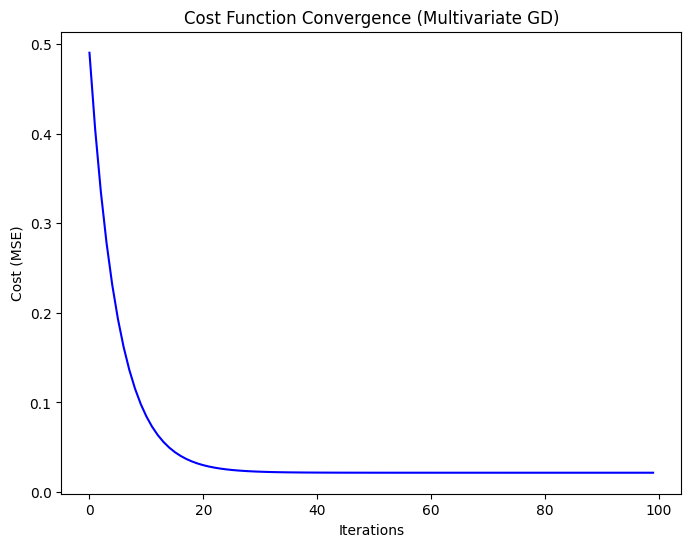

In [20]:
# Plot Cost Convergence

plt.figure(figsize=(8,6))
plt.plot(range(len(cost_history)), cost_history, color="blue")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence (Multivariate GD)")
plt.show()
